In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data = train_data.drop(['PassengerId'], axis=1)
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [5]:
test_mean = test_data["Age"].mean()
test_std = test_data["Age"].std()
test_is_null = test_data["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age_test = np.random.randint(test_mean - test_std, test_mean + test_std, size = test_is_null)
# fill NaN values in Age column with random values generated
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age_test
test_data["Age"] = age_slice
test_data["Age"] = test_data["Age"].astype(int)
test_data["Age"].isnull().sum()

0

In [6]:
train_mean = train_data["Age"].mean()
train_std = train_data["Age"].std()
train_is_null = train_data["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age_train = np.random.randint(train_mean - train_std, train_mean + train_std, size = train_is_null)
# fill NaN values in Age column with random values generated
age_slice = train_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age_train
train_data["Age"] = age_slice
train_data["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [7]:
train_data.isnull().sum()
train_data['Embarked'].describe()
common_value = 'S'
train_data['Embarked'] = train_data['Embarked'].fillna(common_value)

In [8]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [9]:
genders = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [10]:
ports = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [11]:
for dataset in data:
    dataset['GroupSize'] = 1
    dataset['GroupSize'] = dataset['Parch'] + dataset['SibSp'] + 1
    dataset = dataset.drop(['Parch'], axis=1)
    dataset = dataset.drop(['SibSp'], axis=1)

% of men survived 0.18890814558058924
% of women survived 0.7420382165605095


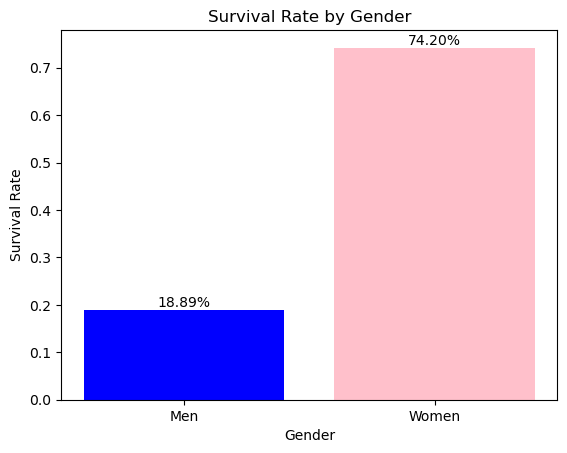

In [12]:
pd.crosstab(train_data['Sex'], train_data['Survived'], margins=True)
women_survived = 233 / 314
men_survived = 109 / 577
print(f'% of men survived {men_survived}')
print(f'% of women survived {women_survived}')

categories = ['Men', 'Women']
survival_rates = [men_survived, women_survived]

plt.bar(categories, survival_rates, color=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

for i, rate in enumerate(survival_rates):
    plt.text(i, rate, f'{rate*100:.2f}%', ha='center', va='bottom')

plt.show()

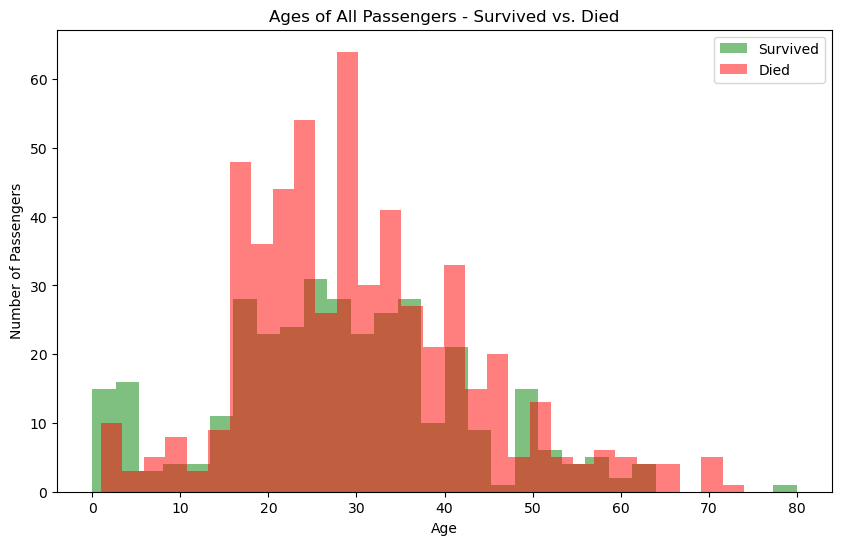

In [13]:
survived = train_data[train_data['Survived'] == 1]
died = train_data[train_data['Survived'] == 0]

plt.figure(figsize=(10, 6))

plt.hist(survived['Age'], bins=30, alpha=0.5, label='Survived', color='green')
plt.hist(died['Age'], bins=30, alpha=0.5, label='Died', color='red')

plt.title('Ages of All Passengers - Survived vs. Died')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

plt.show()

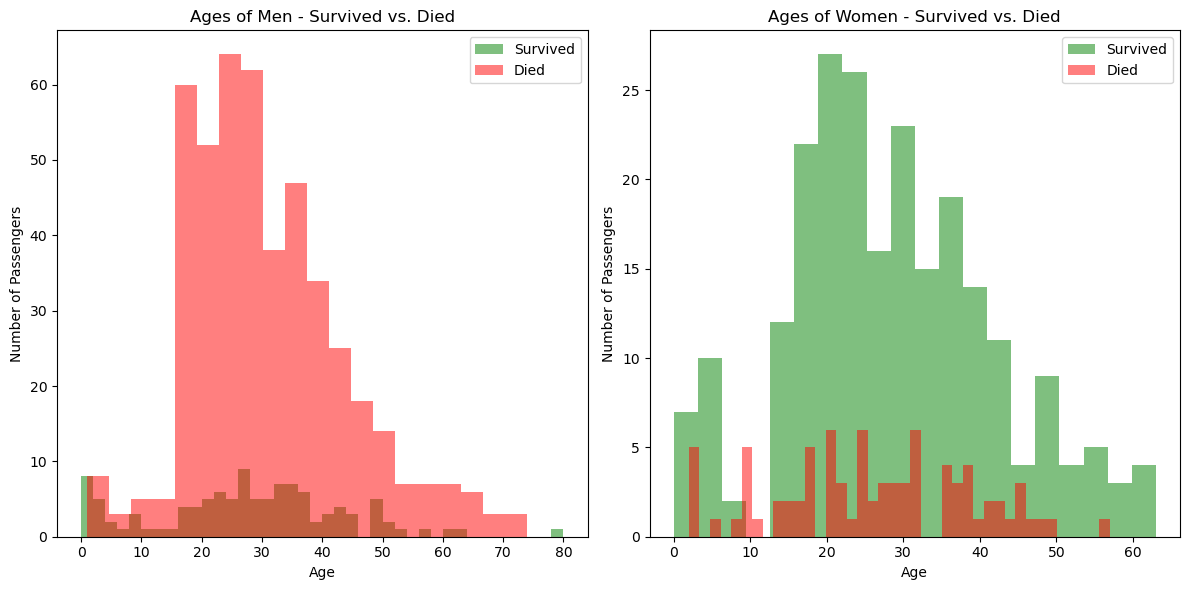

In [14]:
men_survived = train_data[(train_data['Sex'] == 0) & (train_data['Survived'] == 1)]
men_died = train_data[(train_data['Sex'] == 0) & (train_data['Survived'] == 0)]

women_survived = train_data[(train_data['Sex'] == 1) & (train_data['Survived'] == 1)]
women_died = train_data[(train_data['Sex'] == 1) & (train_data['Survived'] == 0)]

plt.figure(figsize=(12, 6))

# Men
plt.subplot(1, 2, 1)
plt.hist(men_survived['Age'], bins=40, alpha=0.5, label='Survived', color='green')
plt.hist(men_died['Age'], bins=20, alpha=0.5, label='Died', color='red')
plt.title('Ages of Men - Survived vs. Died')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

# Women
plt.subplot(1, 2, 2)
plt.hist(women_survived['Age'], bins=20, alpha=0.5, label='Survived', color='green')
plt.hist(women_died['Age'], bins=40, alpha=0.5, label='Died', color='red')
plt.title('Ages of Women - Survived vs. Died')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

plt.tight_layout()
plt.show()

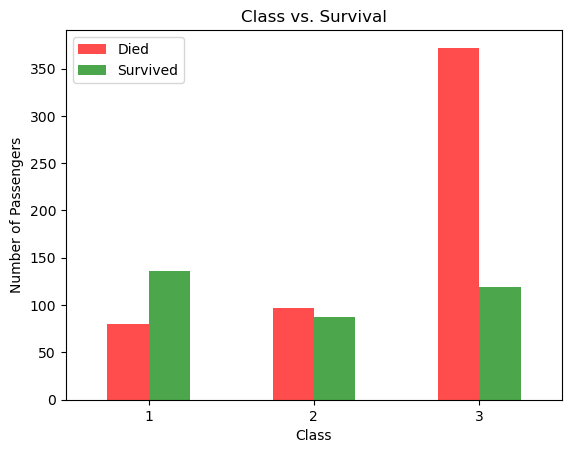

In [15]:
pclass_survival_counts = train_data.groupby(['Pclass', 'Survived']).size().unstack()
pclass_survival_counts.plot(kind='bar', color=['red', 'green'], alpha=0.7)

plt.title('Class vs. Survival')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'], loc='upper left')

plt.show()

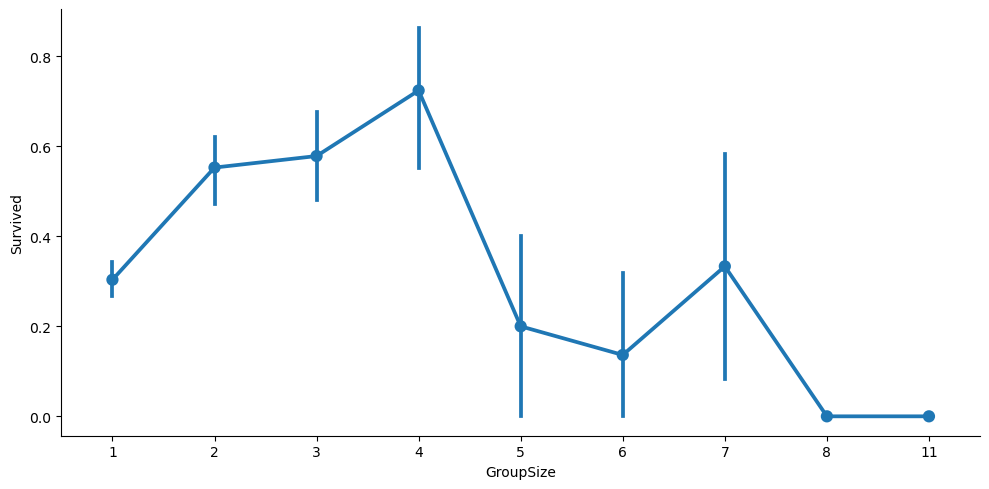

In [16]:
sns.catplot(x ='GroupSize', y ='Survived', data = train_data, kind='point', aspect = 2)

In [17]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "Fare", "Embarked", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
